<a href="https://colab.research.google.com/github/robsmokos/PRACA_MGR/blob/main/mgr001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install mesa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.0 MB/s eta 0:00:00


In [ ]:

# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

# Import Cell Agent and OrthogonalMooreGrid
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid

import mesa

In [ ]:
# Instantiate MoneyAgent as CellAgent
class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell  # Instantiate agent with location (x,y)
        self.wealth = 100

    # Move Function
    def move(self):
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        cellmates = [
            a for a in self.cell.agents if a is not self
        ]  # Get all agents in cell

        if self.wealth > 0 and cellmates:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1



class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        # Instantiate an instance of Moore neighborhood space
        self.grid = OrthogonalMooreGrid(
            (width, height), torus=True, capacity=10, random=self.random
        )

        # Create agents
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            # Randomly select agents cell
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")




model = MoneyModel(100, 10, 10)
for _ in range(10):
    model.step()





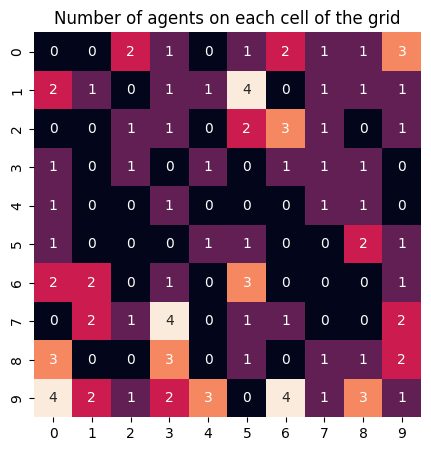

In [ ]:
agent_counts = np.zeros((model.grid.width, model.grid.height))

for cell in model.grid.all_cells:
    agent_counts[cell.coordinate] = len(cell.agents)
# Plot using seaborn, with a visual size of 5x5
g = sns.heatmap(agent_counts,  annot=True, cbar=False, square=False)
g.figure.set_size_inches(5, 5)
g.set(title="Number of agents on each cell of the grid");

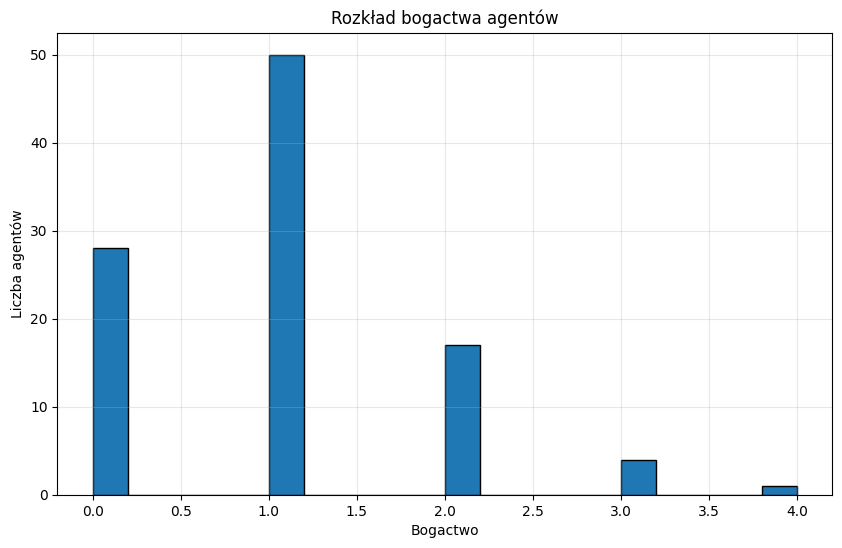

In [ ]:
import matplotlib.pyplot as plt

wealth_values = [agent.wealth for agent in model.agents]

plt.figure(figsize=(10, 6))
plt.hist(wealth_values, bins=20, edgecolor='black')
plt.xlabel('Bogactwo')
plt.ylabel('Liczba agentów')
plt.title('Rozkład bogactwa agentów')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Wyświetl wszystkich agentów z ich bogactwem
print("Lista agentów i ich bogactwo:")
print("-" * 30)
for i, agent in enumerate(model.agents):
    print(f"Agent nr {i+1}: bogactwo = {agent.wealth}")

Lista agentów i ich bogactwo:
------------------------------
Agent nr 1: bogactwo = 100
Agent nr 2: bogactwo = 99
Agent nr 3: bogactwo = 101
Agent nr 4: bogactwo = 100
Agent nr 5: bogactwo = 100
Agent nr 6: bogactwo = 99
Agent nr 7: bogactwo = 100
Agent nr 8: bogactwo = 102
Agent nr 9: bogactwo = 100
Agent nr 10: bogactwo = 99
Agent nr 11: bogactwo = 102
Agent nr 12: bogactwo = 102
Agent nr 13: bogactwo = 100
Agent nr 14: bogactwo = 101
Agent nr 15: bogactwo = 100
Agent nr 16: bogactwo = 103
Agent nr 17: bogactwo = 100
Agent nr 18: bogactwo = 100
Agent nr 19: bogactwo = 102
Agent nr 20: bogactwo = 100
Agent nr 21: bogactwo = 100
Agent nr 22: bogactwo = 98
Agent nr 23: bogactwo = 100
Agent nr 24: bogactwo = 100
Agent nr 25: bogactwo = 100
Agent nr 26: bogactwo = 100
Agent nr 27: bogactwo = 99
Agent nr 28: bogactwo = 98
Agent nr 29: bogactwo = 100
Agent nr 30: bogactwo = 99
Agent nr 31: bogactwo = 100
Agent nr 32: bogactwo = 99
Agent nr 33: bogactwo = 100
Agent nr 34: bogactwo = 100
Agen